Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading CSV File
df = pd.read_csv("./netflix_titles.csv")
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
470,s471,Movie,Bridgerton - The Afterparty,NaN,"David Spade, London Hughes, Fortune Feimster",NaN,"July 13, 2021",2021,TV-14,39 min,Movies,"""Bridgerton"" cast members share behind-the-sce..."
7108,s7109,Movie,최강전사 미니특공대 : 영웅의 탄생,Young Jun Lee,"Um Sang-hyun, Yang Jeong-hwa, Jeon Tae-yeol, S...",NaN,"September 1, 2018",2018,TV-Y7,68 min,Children & Family Movies,"Miniforce, a special task force of elite range..."
6707,s6708,Movie,Ethirmarai,NaN,"Ramanathan, Rakesh",India,"April 1, 2018",2018,TV-14,91 min,"International Movies, Music & Musicals, Thrillers","While investigating a brutal string of deaths,..."
7042,s7043,Movie,I Am Vengeance,Ross Boyask,"Stu Bennett, Anna Shaffer, Mark Griffin, Bryan...",United Kingdom,"December 22, 2018",2018,R,93 min,Action & Adventure,After learning that an ex-military friend and ...
3162,s3163,Movie,It Comes at Night,Trey Edward Shults,"Joel Edgerton, Christopher Abbott, Carmen Ejog...",United States,"December 9, 2019",2017,R,92 min,"Horror Movies, Independent Movies",As danger stalks the world outside his isolate...


In [3]:
# Dropping show_id and description column
df.drop(["show_id","description"], axis=1, inplace=True)

In [4]:
# Shape of the DataFrame
df.shape

(8807, 10)

In [5]:
# Size of the DataFrame
df.size

88070

In [6]:
# Index of the DataFrame
df.index

RangeIndex(start=0, stop=8807, step=1)

In [7]:
# Columns in the DataFrame
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [8]:
# Info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [9]:
# Null values in the DataFrame
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [10]:
# Count of unique values in the country column
df["country"].value_counts().head(3)

country
United States     2818
India              972
United Kingdom     419
Name: count, dtype: int64

In [11]:
# Most frequent value in the column
mode_country = df["country"].mode()[0]
mode_country

'United States'

In [12]:
# Filling in the Null values with most frequent value
df["country"] = df["country"].fillna(mode_country)

In [13]:
# Verifying the absence of Null values
df["country"].isna().sum()

np.int64(0)

In [15]:
# Count of unique values in the date_added column
df["date_added"].value_counts().head(3)

date_added
January 1, 2020     109
November 1, 2019     89
March 1, 2018        75
Name: count, dtype: int64

In [16]:
# Most frequent value in the column
mode_date = df["date_added"].mode()[0]
mode_date

'January 1, 2020'

In [17]:
# Filling in the Null values with most frequent value
df["date_added"] = df["date_added"].fillna(mode_date)

In [18]:
# Verifying the absence of Null values
df["date_added"].isna().sum()

np.int64(0)

In [19]:
# Count of unique values in the rating column
df["rating"].value_counts().head(3)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
Name: count, dtype: int64

In [20]:
# Most frequent value in the column
mode_rating = df["rating"].mode()[0]
mode_rating

'TV-MA'

In [21]:
# Filling in the Null values with most frequent value
df["rating"] = df["rating"].fillna(mode_rating)

In [22]:
# Verifying the absence of Null values
df["rating"].isna().sum()

np.int64(0)

In [23]:
# Count of unique values in the duration column
df["duration"].value_counts().head(3)


duration
1 Season     1793
2 Seasons     425
3 Seasons     199
Name: count, dtype: int64

In [24]:
# Most frequent value in the Column
mode_duration = df["duration"].mode()[0]
mode_duration

'1 Season'

In [25]:
# Filling in the Null values with most frequent value
df["duration"] = df["duration"].fillna(mode_duration)

In [26]:
# Verifying the absence of Null values
df["duration"].isna().sum()

np.int64(0)

In [27]:
# We don't have much data to fill Null values in this column
# So, We are filling in the Null values with "Not Mentioned" 
df["director"] = df["director"].fillna("Not Mentioned")

In [28]:
# Verifying the absence of Null values
df["director"].isna().sum()

np.int64(0)

In [29]:
# We don't have much data to fill Null values in this column
# So, We are filling in the Null values with "Not Mentioned" 
df["cast"] = df["cast"].fillna("Not Mentioned")

In [30]:
# Verifying the absence of Null values
df["cast"].isna().sum()

np.int64(0)

In [31]:
# Unique values in the rating column
# We can see "74min, 84min, 66min" in the rating column which makes no sense
# So, We have to remove them
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [32]:
# Modifying DataFrame with rows which don't include "min" in rating column
df = df[~df["rating"].str.contains("min")]

In [33]:
# Unique values in the rating column after the transformation
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [34]:
# Removing (,) commas appearing in the date_added column
# With (,) It will be hard for Pandas to convert the Date to DateTime Format
df["date_added"] = df["date_added"].str.replace(",","")

In [35]:
# Changing the date_added column to DateTime Format
df["date_added"] = pd.to_datetime(df["date_added"], format="mixed")

In [36]:
# Extracting Year from date_added column
df["year"] = df["date_added"].dt.year

In [37]:
# Extracting Month Names from date_added column
df["month"] = df["date_added"].dt.month_name()

In [38]:
# Extracting Date from date_added column
df["date"] = df["date_added"].dt.day

In [39]:
# Extracting first values from listed_in column as genre
df["genre"] = df["listed_in"].str.split(",").str[0]

In [40]:
# Unique genres in the DataFrame
df["genre"].value_counts().head(5)

genre
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
International TV Shows     774
Name: count, dtype: int64

In [41]:
# Modifying DataFrame by including only those Value
# Where cast is not equal to "Not Mentioned"
df = df[df["cast"]!="Not Mentioned"]

In [43]:
# Extracting first values from cast column as lead_actor
df["lead_actor"] = df["cast"].str.split(",").str[0]

In [44]:
# Unique lead_actor in the DataFrame
df["lead_actor"].value_counts().head(5)


lead_actor
Shah Rukh Khan        26
Akshay Kumar          23
Adam Sandler          20
Amitabh Bachchan      20
David Attenborough    20
Name: count, dtype: int64

In [46]:
# Dropping date_added, listed_in and cast column
df.drop(["date_added","listed_in","cast"], axis=1, inplace=True)

In [47]:
# Final DataFrame
df.sample(5)

,type,title,director,country,release_year,rating,duration,year,month,date,genre,lead_actor
236,Movie,Boomika,Rathindran R Prasad,United States,2021,TV-14,122 min,2021,August,23,Horror Movies,Aishwarya Rajesh
576,Movie,Mary Magdalene,Garth Davis,"United Kingdom, Australia, United States",2019,R,120 min,2021,July,1,Dramas,Rooney Mara
5463,Movie,Smoke & Mirrors,Alberto Rodríguez,Spain,2016,TV-14,123 min,2017,June,1,Dramas,Eduard Fernández
186,TV Show,Hometown Cha-Cha-Cha,Not Mentioned,United States,2021,TV-14,1 Season,2021,August,29,International TV Shows,Shin Min-a
192,Movie,C Kkompany,Sachin Yardi,India,2008,TV-14,127 min,2021,August,27,Action & Adventure,Mithun Chakraborty


In [48]:
# DataFrame with type is equal to "Movies"
movies_df = df[df["type"]=="Movie"]
movies_df.head(5)

,type,title,director,country,release_year,rating,duration,year,month,date,genre,lead_actor
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",United States,2021,PG,91 min,2021,September,24,Children & Family Movies,Vanessa Hudgens
7,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,2021,September,24,Dramas,Kofi Ghanaba
9,Movie,The Starling,Theodore Melfi,United States,2021,PG-13,104 min,2021,September,24,Comedies,Melissa McCarthy
12,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127 min,2021,September,23,Dramas,Luna Wedler
13,Movie,Confessions of an Invisible Girl,Bruno Garotti,United States,2021,TV-PG,91 min,2021,September,22,Children & Family Movies,Klara Castanho


In [49]:
# Splitting duration column with spaces
# And, Selecting only the numerical part
# And Finally, Saving it to duration_min column
movies_df = movies_df.copy()
movies_df.loc[:, 'duration_min'] = movies_df["duration"].str.split(" ").str[0].astype(int)

In [50]:
# Dropping duration column
movies_df.drop(["duration"], axis=1, inplace=True)
movies_df.head(5)

,type,title,director,country,release_year,rating,year,month,date,genre,lead_actor,duration_min
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",United States,2021,PG,2021,September,24,Children & Family Movies,Vanessa Hudgens,91
7,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,2021,September,24,Dramas,Kofi Ghanaba,125
9,Movie,The Starling,Theodore Melfi,United States,2021,PG-13,2021,September,24,Comedies,Melissa McCarthy,104
12,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,2021,September,23,Dramas,Luna Wedler,127
13,Movie,Confessions of an Invisible Girl,Bruno Garotti,United States,2021,TV-PG,2021,September,22,Children & Family Movies,Klara Castanho,91


In [51]:
# DataFrame with type is equal to "TV Shows"
tv_shows_df = df[df["type"]=="TV Show"]
tv_shows_df.head(5)

,type,title,director,country,release_year,rating,duration,year,month,date,genre,lead_actor
1,TV Show,Blood & Water,Not Mentioned,South Africa,2021,TV-MA,2 Seasons,2021,September,24,International TV Shows,Ama Qamata
2,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,2021,September,24,Crime TV Shows,Sami Bouajila
4,TV Show,Kota Factory,Not Mentioned,India,2021,TV-MA,2 Seasons,2021,September,24,International TV Shows,Mayur More
5,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,2021,September,24,TV Dramas,Kate Siegel
8,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,TV-14,9 Seasons,2021,September,24,British TV Shows,Mel Giedroyc


In [52]:
# Splitting duration column with spaces
# And, Selecting only the numerical part
# And Finally, Saving it to duration_season column
tv_shows_df = tv_shows_df.copy()
tv_shows_df.loc[:, "duration_season"] = tv_shows_df["duration"].str.split(" ").str[0].astype(int)

In [53]:
# Dropping duration column
tv_shows_df.drop(["duration"], axis=1, inplace=True)
tv_shows_df.head(5)

,type,title,director,country,release_year,rating,year,month,date,genre,lead_actor,duration_season
1,TV Show,Blood & Water,Not Mentioned,South Africa,2021,TV-MA,2021,September,24,International TV Shows,Ama Qamata,2
2,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,2021,September,24,Crime TV Shows,Sami Bouajila,1
4,TV Show,Kota Factory,Not Mentioned,India,2021,TV-MA,2021,September,24,International TV Shows,Mayur More,2
5,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,2021,September,24,TV Dramas,Kate Siegel,1
8,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,TV-14,2021,September,24,British TV Shows,Mel Giedroyc,9


In [54]:
# Count of unique values in the type column
df["type"].value_counts()

type
Movie      5653
TV Show    2326
Name: count, dtype: int64

In [55]:
# Count of unique values in the rating column
df["rating"].value_counts()

rating
TV-MA       2885
TV-14       1955
R            790
TV-PG        719
PG-13        477
TV-Y7        310
PG           279
TV-Y         268
TV-G         183
NR            63
G             40
TV-Y7-FV       4
NC-17          3
UR             3
Name: count, dtype: int64

In [56]:
# Count of unique values in the release_year column
df["release_year"].value_counts().head(5)

release_year
2018    1026
2019     917
2017     911
2020     827
2016     804
Name: count, dtype: int64

In [57]:
# Count of unique values in the country column
df["country"].value_counts().head(5)

country
United States     3162
India              940
United Kingdom     351
Japan              240
South Korea        196
Name: count, dtype: int64

In [58]:
# Count of unique values in the genre column
df["genre"].value_counts().head(5)

genre
Dramas                      1592
Comedies                    1204
Action & Adventure           853
International TV Shows       743
Children & Family Movies     573
Name: count, dtype: int64

In [59]:
# Setting Plot Style to "ticks"
sns.set_style("ticks")

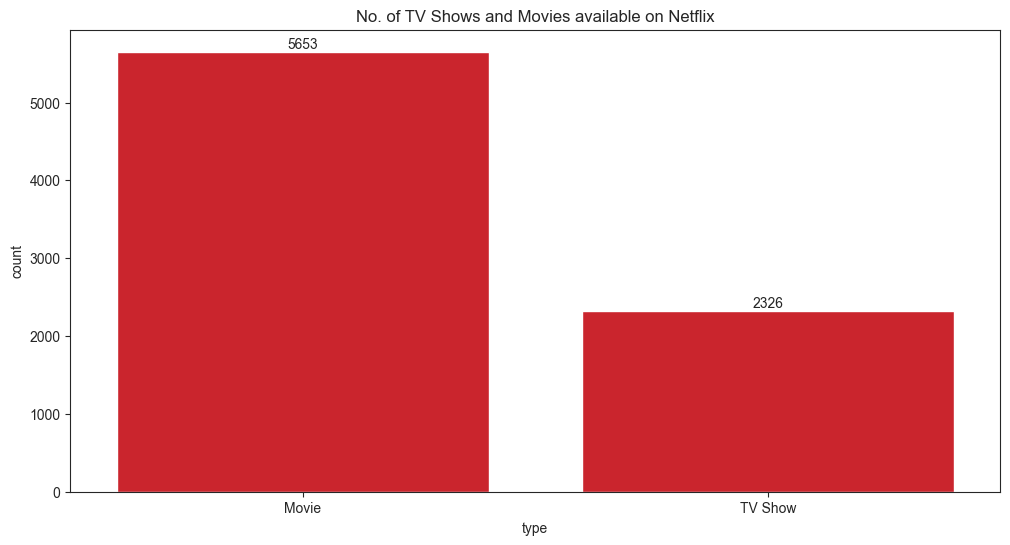

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data=df, x="type", color="#E50914", order=df["type"].value_counts().index)
ax.set_title("No. of TV Shows and Movies available on Netflix")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

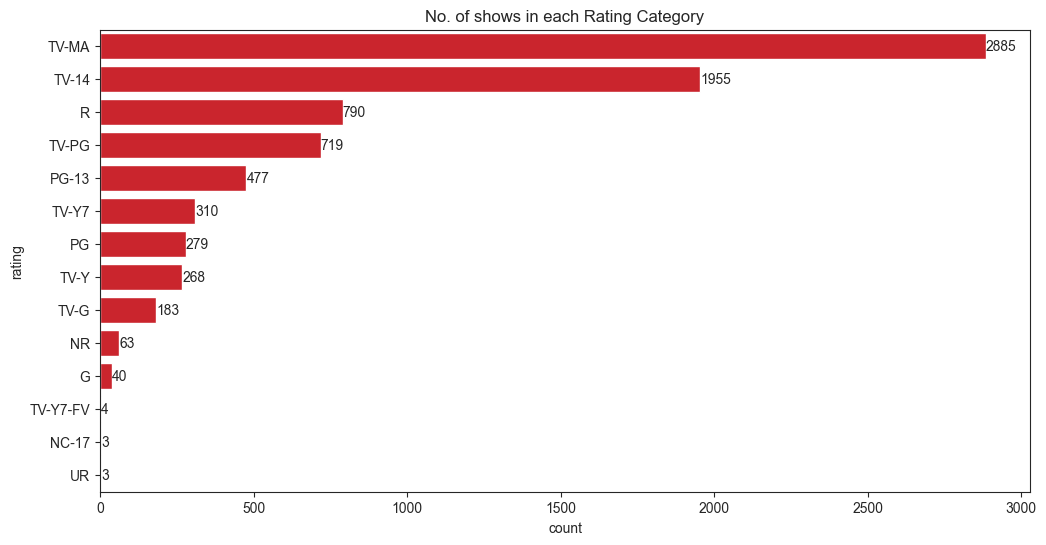

In [62]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data=df, y="rating", order=df["rating"].value_counts().index, color="#E50914")
ax.set_title("No. of shows in each Rating Category")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

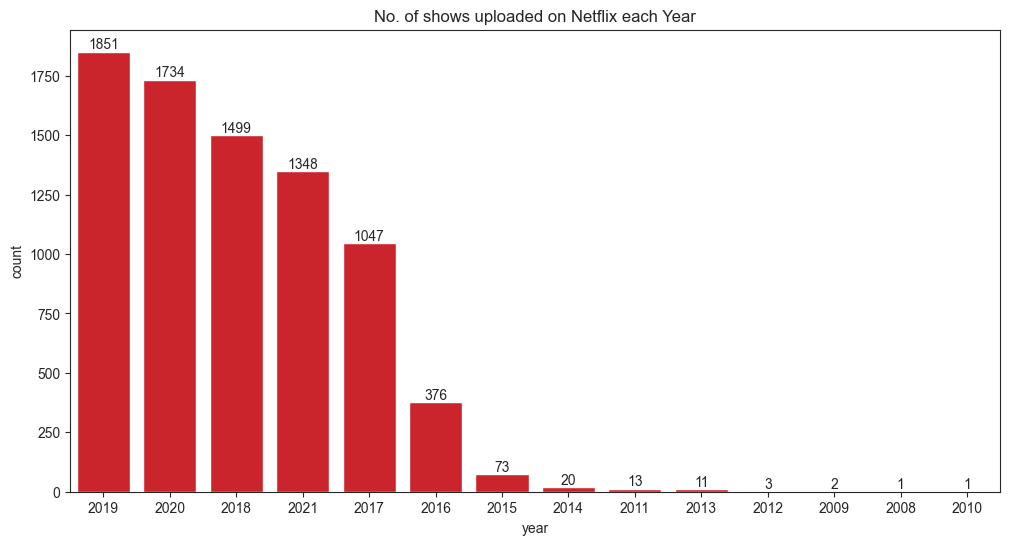

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data=df, x="year", order=df["year"].value_counts().index, color="#E50914")
ax.set_title("No. of shows uploaded on Netflix each Year")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

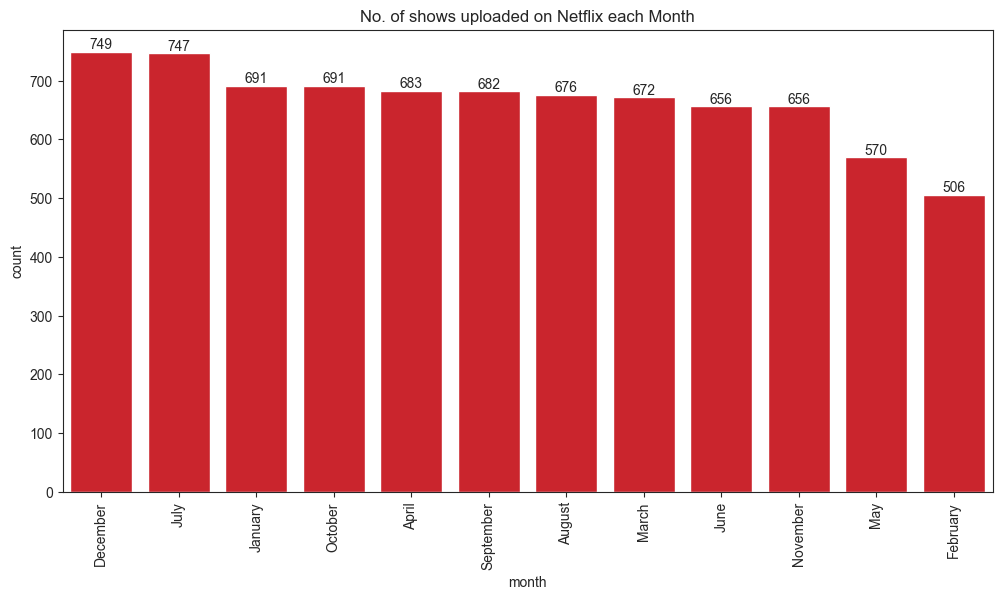

In [64]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data=df, x="month", order=df["month"].value_counts().index, color="#E50914")
ax.set_title("No. of shows uploaded on Netflix each Month")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

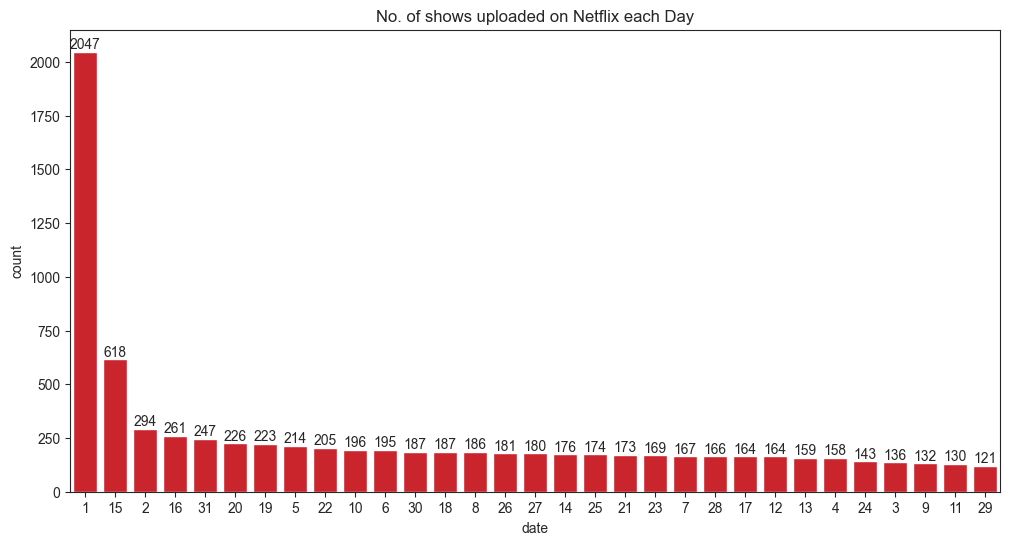

In [65]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data=df, x="date", order=df["date"].value_counts().index, color="#E50914")
ax.set_title("No. of shows uploaded on Netflix each Day")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [66]:
country_counts = df["country"].value_counts().head(10)

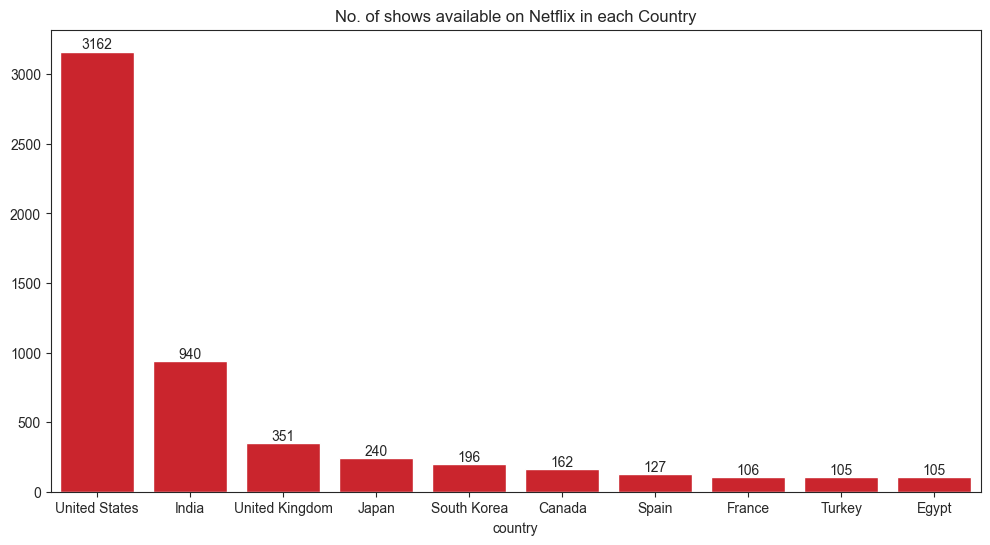

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=country_counts.index, y=country_counts.values, color="#E50914")
ax.set_title("No. of shows available on Netflix in each Country")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

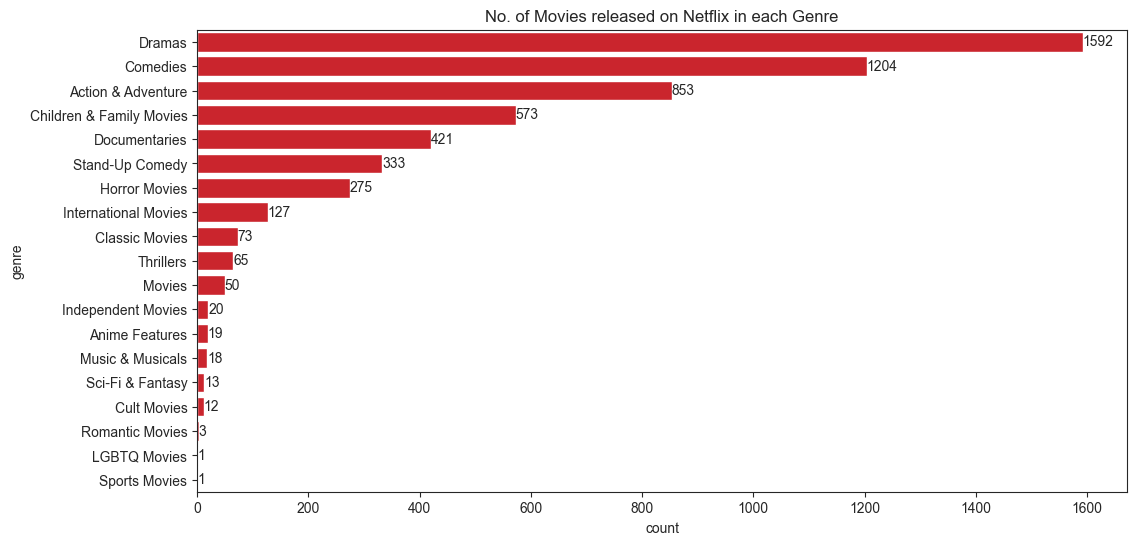

In [68]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data=movies_df, y="genre", order=movies_df["genre"].value_counts().index, color="#E50914")
ax.set_title("No. of Movies released on Netflix in each Genre")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

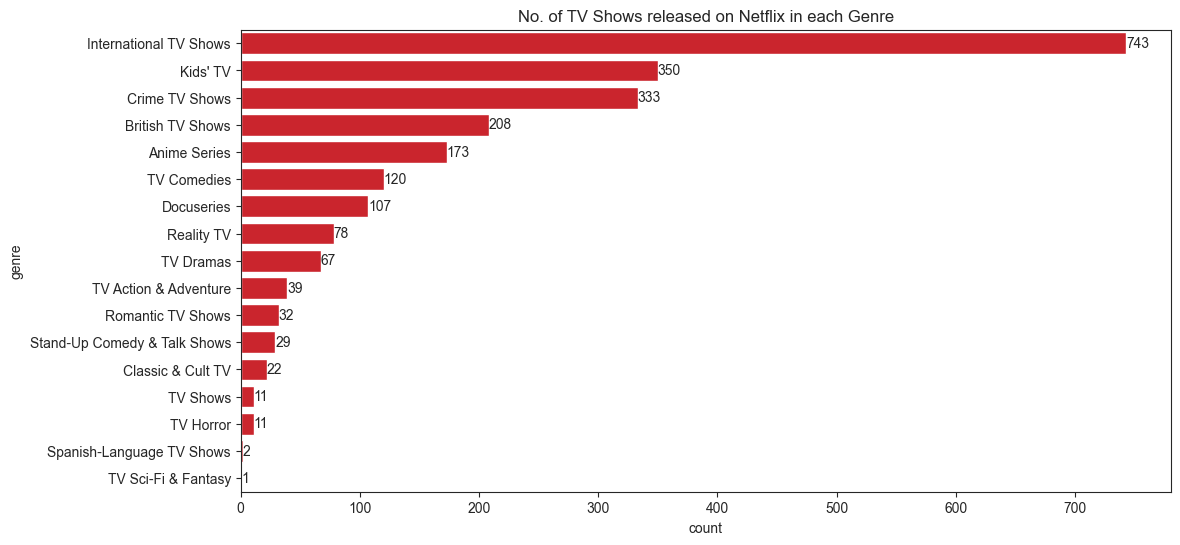

In [69]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data=tv_shows_df, y="genre", order=tv_shows_df["genre"].value_counts().index, color="#E50914")
ax.set_title("No. of TV Shows released on Netflix in each Genre")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [70]:
actor_count_movies = movies_df["lead_actor"].value_counts().head(10) 

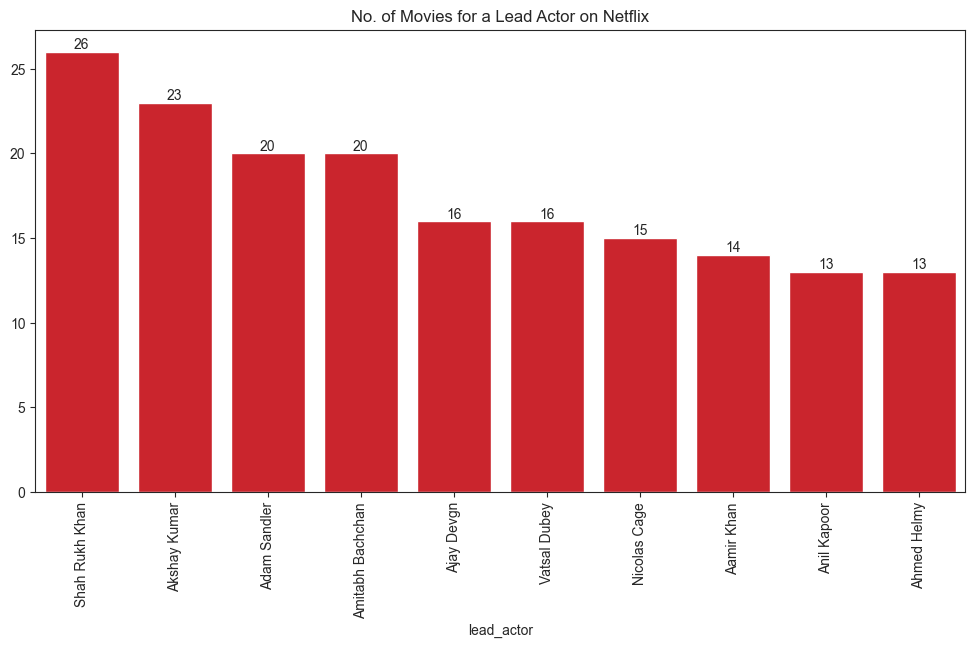

In [71]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=actor_count_movies.index, y=actor_count_movies.values, color="#E50914")
ax.set_title("No. of Movies for a Lead Actor on Netflix")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [72]:
actor_count_tv = tv_shows_df["lead_actor"].value_counts().head(10)

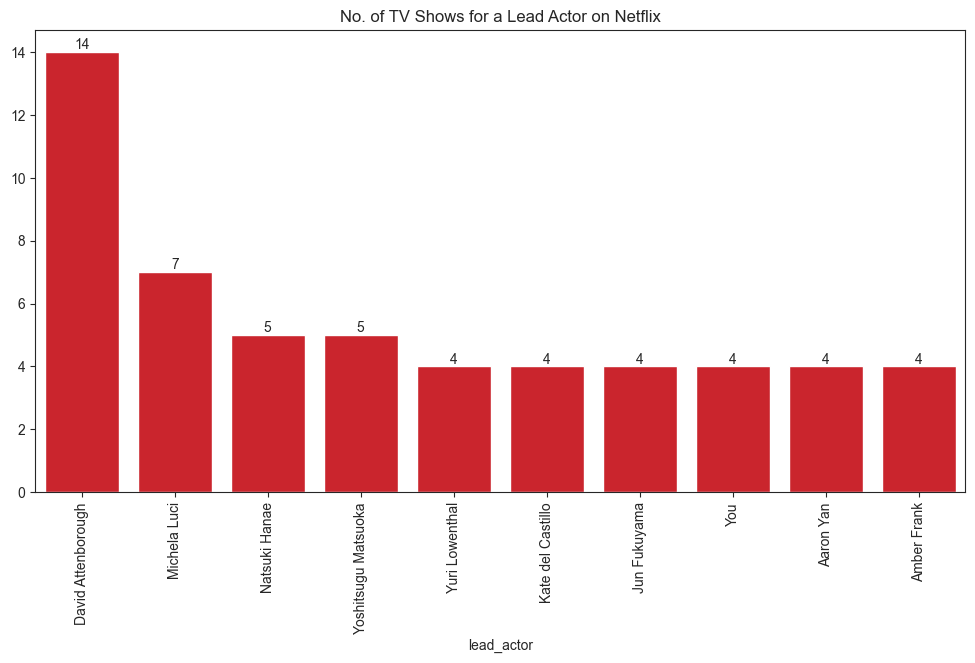

In [73]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=actor_count_tv.index, y=actor_count_tv.values, color="#E50914")
ax.set_title("No. of TV Shows for a Lead Actor on Netflix")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [74]:
genre_mean_movies = movies_df.groupby(["genre"])["duration_min"].mean().round().sort_values(ascending=False)

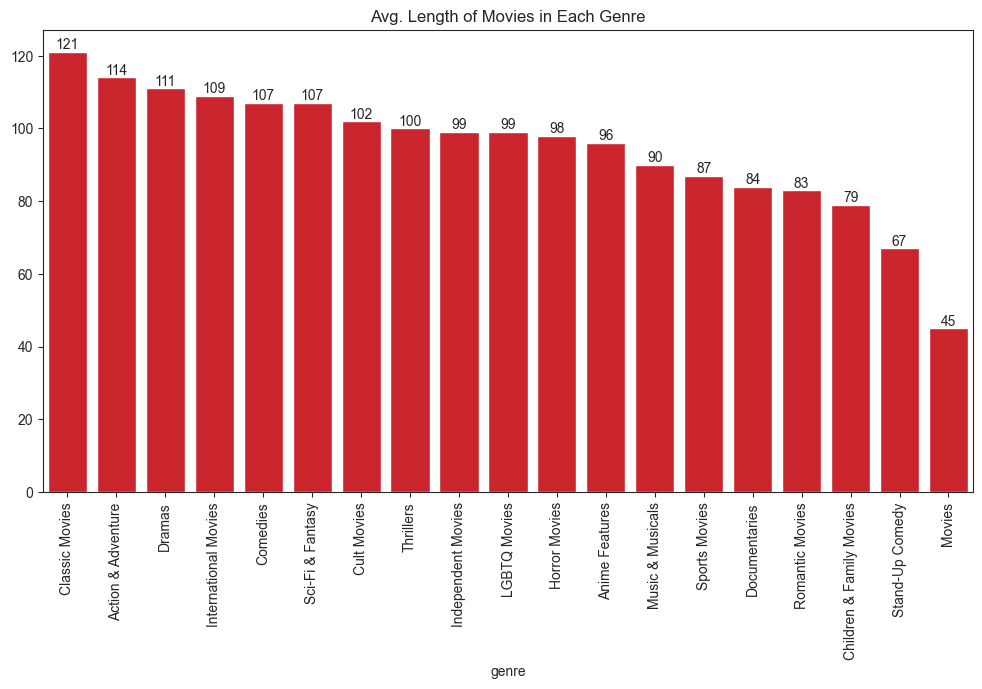

In [75]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=genre_mean_movies.index, y=genre_mean_movies.values, color="#E50914")
ax.set_title("Avg. Length of Movies in Each Genre")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [76]:
genre_mean_movies = movies_df.groupby(["genre"])["duration_min"].mean().round().sort_values(ascending=False)

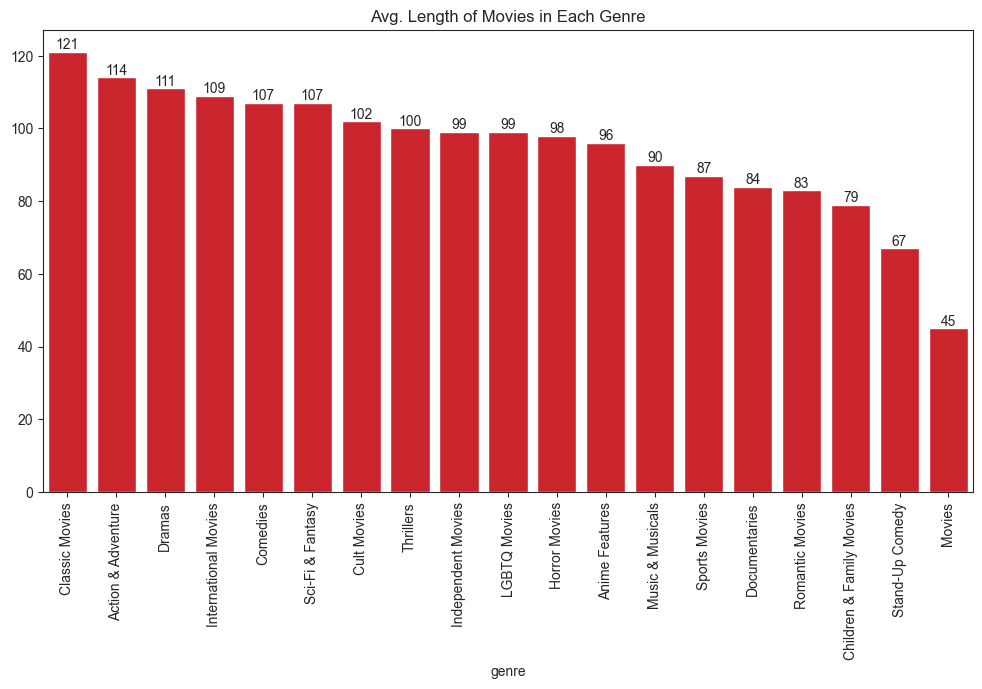

In [77]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=genre_mean_movies.index, y=genre_mean_movies.values, color="#E50914")
ax.set_title("Avg. Length of Movies in Each Genre")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [78]:
genre_mean_tv = tv_shows_df.groupby(["genre"])["duration_season"].mean().round().sort_values(ascending=False)

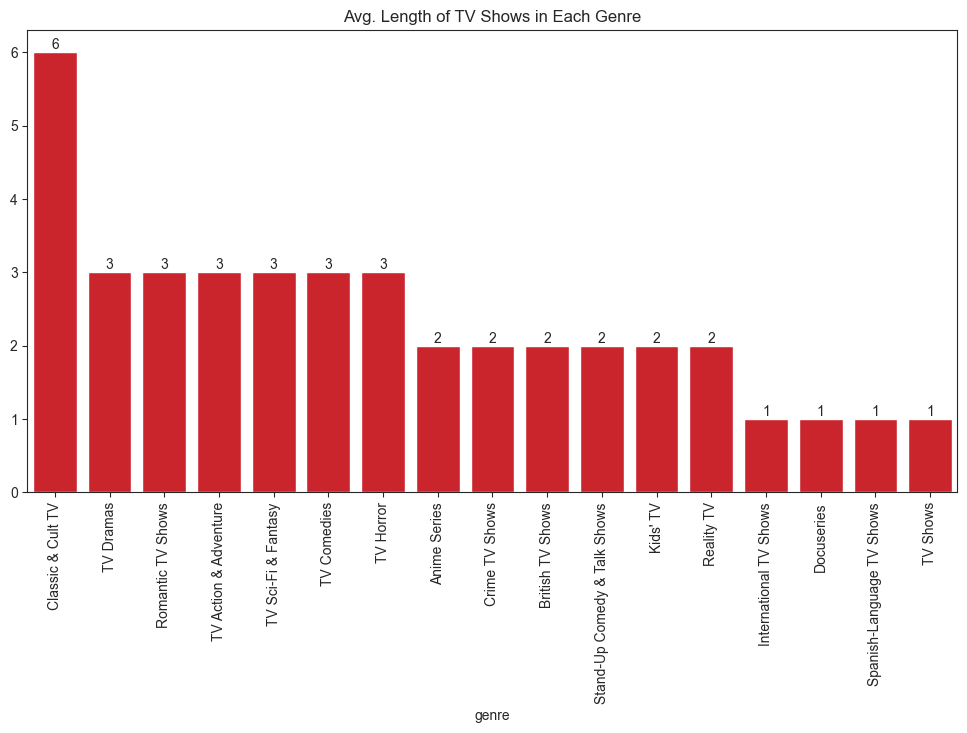

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=genre_mean_tv.index, y=genre_mean_tv.values, color="#E50914")
ax.set_title("Avg. Length of TV Shows in Each Genre")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

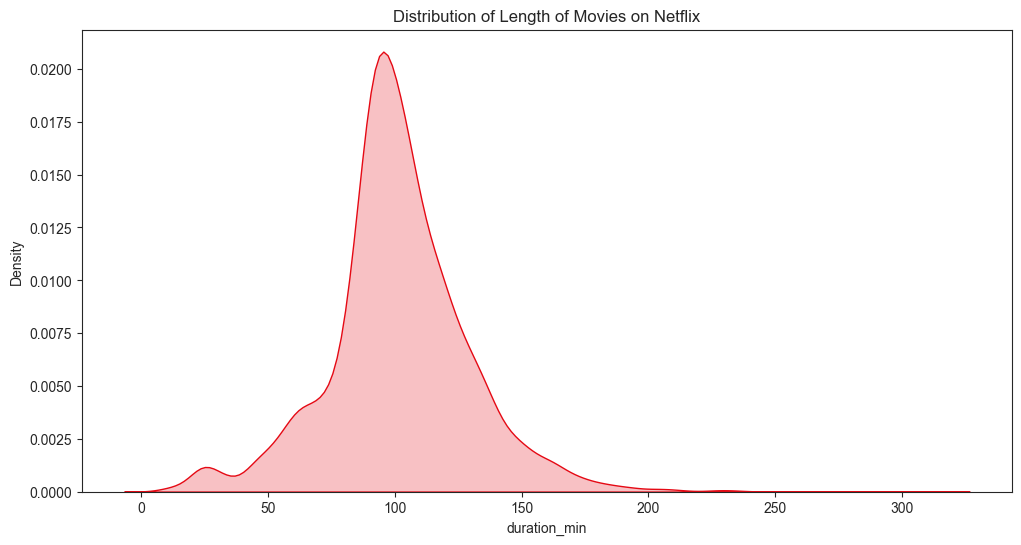

In [80]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(movies_df["duration_min"], color="#E50914", fill=True)
ax.set_title("Distribution of Length of Movies on Netflix")
plt.show()

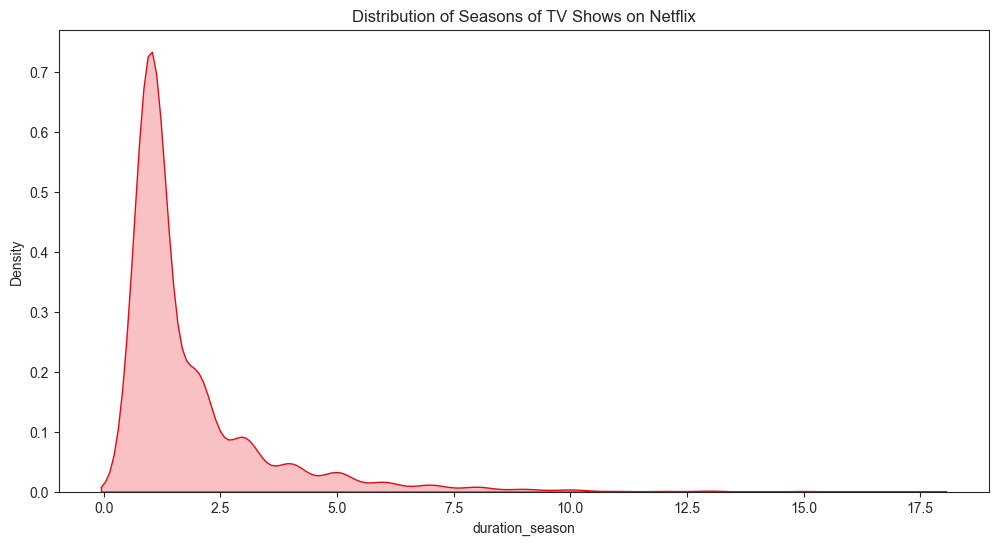

In [81]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(tv_shows_df["duration_season"], color="#E50914", fill=True)
ax.set_title("Distribution of Seasons of TV Shows on Netflix")
plt.show()